In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from data_explore import viz
# fname = '../data/SOCATv2024-1d_005deg-colloc-r20250224/SOCATv2024_1d_005deg_collocated_2015-r20250224.pq'
fname = '../data/SOCATv2024_raw-collocated-1982_2021/SOCATv2024_raw_r20250307-1982_2021/SOCATv2024v_collocated-2010.pq'
df_raw = pd.read_parquet(fname)
df_raw.head(5)

,expocode,lon,lat,sal,sst_deg_c,pppp_hpa,woa_sss,ncep_slp_hpa,dist_to_land_km,fco2rec_uatm,...,sst_cci_uncertainty,ice_cci,time_sstcci,lat_sstcci,lon_sstcci,sss_cci,sss_cci_random_error,lat_ssscci,lon_ssscci,time_ssscci
726357,06AQ20091129,205.4190,-54.3970,33.859,7.799,981.0,34.074,978.1,1000.0,336.676,...,0.25,0.0,2010-01-01,-54.375,205.425003,NaN,NaN,NaN,NaN,NaT
726358,06AQ20091129,205.4189,-54.3967,33.861,7.788,981.0,34.074,978.1,1000.0,336.263,...,0.25,0.0,2010-01-01,-54.375,205.425003,NaN,NaN,NaN,NaN,NaT
726359,06AQ20091129,205.4188,-54.3964,33.862,7.777,981.0,34.074,978.1,1000.0,335.964,...,0.25,0.0,2010-01-01,-54.375,205.425003,NaN,NaN,NaN,NaN,NaT
726360,06AQ20091129,205.4186,-54.3961,33.864,7.767,981.0,34.074,978.1,1000.0,335.150,...,0.25,0.0,2010-01-01,-54.375,205.425003,NaN,NaN,NaN,NaN,NaT
726361,06AQ20091129,205.4185,-54.3958,33.865,7.756,981.0,34.074,978.1,1000.0,335.392,...,0.25,0.0,2010-01-01,-54.375,205.425003,NaN,NaN,NaN,NaN,NaT


In [10]:
df_raw['time_1d'] = df_raw['time'].dt.round('D')
index = pd.MultiIndex.from_frame(df_raw[['expocode', 'time_1d', 'lat', 'lon']])
df = df_raw.drop(['expocode', 'lon', 'lat', 'time_1d'], axis=1)
df.set_index(index, inplace=True)
# df = df.groupby(level=[0, 1, 2, 3]).mean()
df.index.is_unique

# df = df_raw

False

In [11]:
df.head()

sal  sst_deg_c  pppp_hpa  \
expocode     time_1d    lat      lon                                     
06AQ20091129 2010-01-01 -54.3970 205.4190  33.859      7.799     981.0   
                        -54.3967 205.4189  33.861      7.788     981.0   
                        -54.3964 205.4188  33.862      7.777     981.0   
                        -54.3961 205.4186  33.864      7.767     981.0   
                        -54.3958 205.4185  33.865      7.756     981.0   

                                           woa_sss  ncep_slp_hpa  \
expocode     time_1d    lat      lon                               
06AQ20091129 2010-01-01 -54.3970 205.4190   34.074         978.1   
                        -54.3967 205.4189   34.074         978.1   
                        -54.3964 205.4188   34.074         978.1   
                        -54.3961 205.4186   34.074         978.1   
                        -54.3958 205.4185   34.074         978.1   

                                           dist_to_land_km  fco2rec_uatm  \
expocode     time_1d    lat      lon                                       
06AQ20091129 2010-01-01 -54.3970 205.4190           1000.0       336.676   
                        -54.3967 205.4189           1000.0       336.263   
                        -54.3964 205.4188           1000.0       335.964   
                        -54.3961 205.4186           1000.0       335.150   
                        -54.3958 205.4185           1000.0       335.392   

                                           fco2rec_flag                time  \
expocode     time_1d    lat      lon                                          
06AQ20091129 2010-01-01 -54.3970 205.4190             2 2010-01-01 00:33:17   
                        -54.3967 205.4189             2 2010-01-01 00:34:34   
                        -54.3964 205.4188             2 2010-01-01 00:35:50   
                        -54.3961 205.4186             2 2010-01-01 00:37:06   
                        -54.3958 205.4185             2 2010-01-01 00:38:22   

                                           year  ...  sst_cci_uncertainty  \
expocode     time_1d    lat      lon             ...                        
06AQ20091129 2010-01-01 -54.3970 205.4190  2010  ...                 0.25   
                        -54.3967 205.4189  2010  ...                 0.25   
                        -54.3964 205.4188  2010  ...                 0.25   
                        -54.3961 205.4186  2010  ...                 0.25   
                        -54.3958 205.4185  2010  ...                 0.25   

                                           ice_cci  time_sstcci lat_sstcci  \
expocode     time_1d    lat      lon                                         
06AQ20091129 2010-01-01 -54.3970 205.4190      0.0   2010-01-01    -54.375   
                        -54.3967 205.4189      0.0   2010-01-01    -54.375   
                        -54.3964 205.4188      0.0   2010-01-01    -54.375   
                        -54.3961 205.4186      0.0   2010-01-01    -54.375   
                        -54.3958 205.4185      0.0   2010-01-01    -54.375   

                                           lon_sstcci  sss_cci  \
expocode     time_1d    lat      lon                             
06AQ20091129 2010-01-01 -54.3970 205.4190  205.425003      NaN   
                        -54.3967 205.4189  205.425003      NaN   
                        -54.3964 205.4188  205.425003      NaN   
                        -54.3961 205.4186  205.425003      NaN   
                        -54.3958 205.4185  205.425003      NaN   

                                           sss_cci_random_error  lat_ssscci  \
expocode     time_1d    lat      lon                                          
06AQ20091129 2010-01-01 -54.3970 205.4190                   NaN         NaN   
                        -54.3967 205.4189                   NaN         NaN   
                        -54.3964 205.4188                   NaN         NaN   
                  

# Create training set
1. sort the entries for each cruise by time_avg to determine the coordinate sequence order, however there are some weird cases (2015, '33WA20150413')
2. calculate distances from every location to the location at the previous time step
3. for every entry, sum the distances up to that entry to derive total traveled distance
4. iterate through the locations and cut at 64*5 kms (or if two much time/space passed between two subsequent entries)
4. bin traveled distances in buckets of 5km width for each segment

In [12]:
from itertools import accumulate, chain
import numpy as np
from haversine import haversine_vector

TIME_COL = 'time'
LAT_COL = 'lat'
LON_COL = 'lon'
# TIME_COL = 'time_avg'
# LAT_COL = 'lat_005'
# LON_COL = 'lon_005'
def get_dtoprev(srt_cruise):
    # calculate distance in kms to previous locations
    coords = np.column_stack([
        srt_cruise.index.get_level_values(LAT_COL).to_numpy(),
        srt_cruise.index.get_level_values(LON_COL).to_numpy()
    ])
    
    d = np.full(coords.shape[0], np.nan, dtype=np.float32)
    if coords.shape[0] > 1:
        d[1:] = haversine_vector(coords[1:], coords[:-1], normalize=True)
    
    return d

def ifprint(verbose, data):
    if verbose:
        print(data)

def divide_cruise(cruise, num_windows=64, len_window=5, max_time_delta=pd.Timedelta(days=1000), max_d_delta=np.inf, verbose=False):

    srt_cruise = cruise.sort_values(by=TIME_COL)
    d_diff = get_dtoprev(srt_cruise)
    ifprint(verbose, d_diff[30:40])
    time_diff = srt_cruise[TIME_COL].diff()
    # ifprint(verbose, time_diff)
    track_len = num_windows * len_window

    cs = 0
    segs = []
    cur_seg = [0]
    large_time_diffs = []
    for (i, dprev) in enumerate(d_diff[1:]):
        cs += dprev
        if dprev > 20:
            large_time_diffs.append(time_diff.iloc[i + 1])
        # if the segment length exceeds 64*5 kms or the time jumps than max_time_delta or jumps more than max_d_delta kilometers
        # end the segment
        if cs >= track_len or time_diff.iloc[i + 1] >= max_time_delta or dprev >= max_d_delta:
            segs.append(cur_seg)
            cur_seg = [0]
            cs = 0
        else:
            cur_seg.append(dprev.astype(np.float32))
    if cur_seg:
        segs.append(cur_seg)
    # ifprint(verbose, segs[:4])
    # ifprint(verbose, large_time_diffs)

    ix_segs = chain(*[[i]*len(seg) for (i, seg) in enumerate(segs)])
    cum_segs = chain(*[list(accumulate(seg)) for seg in segs])
    
    sdf = pd.DataFrame({'segment_id': list(ix_segs), 'track_length':list(cum_segs)}, index=srt_cruise.index)
    # ifprint(verbose, sdf.iloc[:4].track_length)
    bins = np.arange(-len_window / 2., track_len + len_window, len_window)
    cut_sdf = pd.cut(sdf.track_length, bins=bins, labels=False)
    
    srt_cruise.set_index(cruise.index)
    srt_cruise['bin_id'] = cut_sdf.values
    srt_cruise['segment_id'] = sdf.segment_id
    return srt_cruise

In [13]:
NUM_BINS = 64
LEN_WINDOW = 5
expocodes = df.index.get_level_values('expocode').unique()
cruise_id = '49UF20100414'#expocodes[10]
# cruise_id = '06AQ20091129'
cruise = df.loc[cruise_id]
# print(cruise.head())
srt_cruise = divide_cruise(cruise, 
                           num_windows=NUM_BINS, 
                           len_window=LEN_WINDOW, 
                           max_time_delta=pd.Timedelta(days=2), 
                           verbose=True)
# print(srt_cruise.head())
map = viz.plot_cruise_interactive_scatter_map(srt_cruise.segment_id, #** ((srt_cruise.segment_id % 2 == 0) * 100), # some dumb trick to get hard color changes
                                              cmap='viridis',
                                              lat_name=LAT_COL,
                                              lon_name=LON_COL,
                                              time_name='time_1d') 
# map = viz.plot_cruise_interactive_scatter_map(cruise['5kmtracks'], cmap='viridis')
map

[10.657061   0.9163878  1.4409379  1.8329954  0.         1.4410077
  2.1441817  0.         0.9167174  1.4411474]


In [14]:

# perform segmentation on the whole dataset
df2 = df.groupby(level=0, group_keys=False).apply(
    lambda cruise: divide_cruise(cruise,
                                 num_windows=NUM_BINS,
                                 len_window=LEN_WINDOW, 
                                 max_time_delta=pd.Timedelta(days=2)
                                 )
    )
df2.head()

sal  sst_deg_c  pppp_hpa  \
expocode     time_1d    lat      lon                                     
06AQ20091129 2010-01-01 -54.3970 205.4190  33.859      7.799     981.0   
                        -54.3967 205.4189  33.861      7.788     981.0   
                        -54.3964 205.4188  33.862      7.777     981.0   
                        -54.3961 205.4186  33.864      7.767     981.0   
                        -54.3958 205.4185  33.865      7.756     981.0   

                                           woa_sss  ncep_slp_hpa  \
expocode     time_1d    lat      lon                               
06AQ20091129 2010-01-01 -54.3970 205.4190   34.074         978.1   
                        -54.3967 205.4189   34.074         978.1   
                        -54.3964 205.4188   34.074         978.1   
                        -54.3961 205.4186   34.074         978.1   
                        -54.3958 205.4185   34.074         978.1   

                                           dist_to_land_km  fco2rec_uatm  \
expocode     time_1d    lat      lon                                       
06AQ20091129 2010-01-01 -54.3970 205.4190           1000.0       336.676   
                        -54.3967 205.4189           1000.0       336.263   
                        -54.3964 205.4188           1000.0       335.964   
                        -54.3961 205.4186           1000.0       335.150   
                        -54.3958 205.4185           1000.0       335.392   

                                           fco2rec_flag                time  \
expocode     time_1d    lat      lon                                          
06AQ20091129 2010-01-01 -54.3970 205.4190             2 2010-01-01 00:33:17   
                        -54.3967 205.4189             2 2010-01-01 00:34:34   
                        -54.3964 205.4188             2 2010-01-01 00:35:50   
                        -54.3961 205.4186             2 2010-01-01 00:37:06   
                        -54.3958 205.4185             2 2010-01-01 00:38:22   

                                           year  ...  time_sstcci  lat_sstcci  \
expocode     time_1d    lat      lon             ...                            
06AQ20091129 2010-01-01 -54.3970 205.4190  2010  ...   2010-01-01     -54.375   
                        -54.3967 205.4189  2010  ...   2010-01-01     -54.375   
                        -54.3964 205.4188  2010  ...   2010-01-01     -54.375   
                        -54.3961 205.4186  2010  ...   2010-01-01     -54.375   
                        -54.3958 205.4185  2010  ...   2010-01-01     -54.375   

                                           lon_sstcci sss_cci  \
expocode     time_1d    lat      lon                            
06AQ20091129 2010-01-01 -54.3970 205.4190  205.425003     NaN   
                        -54.3967 205.4189  205.425003     NaN   
                        -54.3964 205.4188  205.425003     NaN   
                        -54.3961 205.4186  205.425003     NaN   
                        -54.3958 205.4185  205.425003     NaN   

                                           sss_cci_random_error  lat_ssscci  \
expocode     time_1d    lat      lon                                          
06AQ20091129 2010-01-01 -54.3970 205.4190                   NaN         NaN   
                        -54.3967 205.4189                   NaN         NaN   
                        -54.3964 205.4188                   NaN         NaN   
                        -54.3961 205.4186                   NaN         NaN   
                        -54.3958 205.4185                   NaN         NaN   

                                           lon_ssscci  time_ssscci  bin_id  \
expocode     time_1d    lat      lon                                         
06AQ20091129 2010-01-01 -54.3970 205.4190         NaN          NaT       0   
                        -54.3967 205.4189         NaN          NaT       0   
                        -54.3964 205.4188         NaN          NaT       

In [15]:
df2.columns

Index(['sal', 'sst_deg_c', 'pppp_hpa', 'woa_sss', 'ncep_slp_hpa',
       'dist_to_land_km', 'fco2rec_uatm', 'fco2rec_flag', 'time', 'year',
       'chl_globcolour', 'chl_globcolour_uncert', 'chl_globcolour_flags',
       'time_chlgc', 'lat_chlgc', 'lon_chlgc', 'temp_soda', 'salt_soda',
       'mld_dens_soda', 'lon_soda', 'lat_soda', 'depth_soda', 'time_soda',
       'ssh_adt', 'ssh_sla', 'lat_sshcm', 'lon_sshcm', 'time_sshcm', 'sst_cci',
       'sst_cci_uncertainty', 'ice_cci', 'time_sstcci', 'lat_sstcci',
       'lon_sstcci', 'sss_cci', 'sss_cci_random_error', 'lat_ssscci',
       'lon_ssscci', 'time_ssscci', 'bin_id', 'segment_id'],
      dtype='object')

In [16]:
# function to create the actual numpy array (maybe needlessly complicated)
def df_to_numpy(df2, num_bins):
    binned = df2.groupby([pd.Grouper(level=0), 'segment_id', 'bin_id']).mean() # first bin all values in the 5km buckets found above
    # index level of <binned> : [expocode, segment_id, bin_id]
    bins_per_seg = binned.groupby([pd.Grouper(level=0), pd.Grouper(level=1)]).size() # number of non-empty buckets per segment
    num_segs_tot = bins_per_seg.size # total number of segments in dataset
    segs_per_expocode = bins_per_seg.groupby(level=0).size() # number of segments per expocode
    
    offsets = segs_per_expocode.values.cumsum() # offsets to index segments in expocode table
    offsets_expocode = np.zeros_like(offsets)
    offsets_expocode[1:] = offsets[:-1] # offsets at expocode level
    offsets_seg = np.repeat(offsets_expocode, segs_per_expocode.values)
    offsets_seg = offsets_seg + bins_per_seg.index.get_level_values(level=1).to_numpy() # offset for each segment
    offsets_seg_per_bin = np.repeat(offsets_seg, bins_per_seg) # offset for each bin (row index in dataset does not change)

    predictors = ['sst_cci', 'sss_cci', 'pppp_hpa', 'woa_sss', 'ncep_slp_hpa', 'dist_to_land_km', 
                  'chl_globcolour', 'temp_soda', 'salt_soda', 'mld_dens_soda', 
                  'ssh_adt', 'ssh_sla', 'ice_cci']
    dataset = np.full((len(predictors) + 1, num_segs_tot, num_bins + 1), 
                      np.nan, 
                      dtype=np.float32)
    bin_ids = binned.index.get_level_values(level=2).to_numpy()

    # I only add the fco2 values for the moment
    y = binned.fco2rec_uatm.values
    X = binned[predictors].values.T
    dataset[0, offsets_seg_per_bin, bin_ids] = y
    dataset[1:, offsets_seg_per_bin, bin_ids] = X

    expomap = pd.DataFrame(offsets_seg, index=bins_per_seg.index)

    return dataset, expomap

In [17]:
ds, expomap = df_to_numpy(df2, NUM_BINS)

number of segments for 49UF20100414:  7


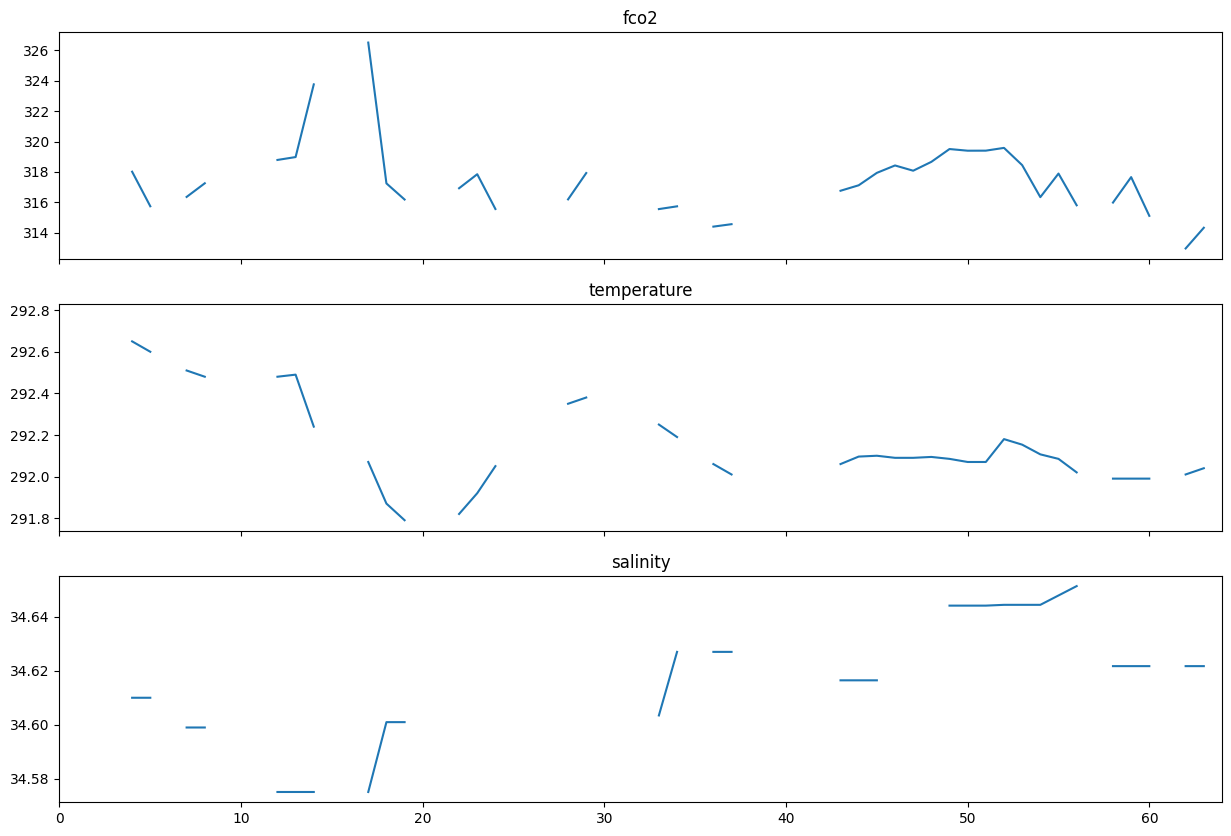

In [18]:
ixs = expomap.loc[cruise_id, :].values.flatten()
print(f"number of segments for {cruise_id}: ", ixs.shape[0])
fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)
ix = ixs[1]

plt.xlim((0, NUM_BINS))
titles = ['fco2', 'temperature', 'salinity']
for i in [0,1,2]:
    axs[i].plot(ds[i, ix])
    axs[i].set_title(titles[i])
plt.show()

In [20]:
ds.shape

(14, 4866, 65)

dataset shape:  (4866, 65)
total number of entries:  316290
fraction of valid observations:  0.7684403553700717
fraction of segments without any nans:  0.03616933826551583


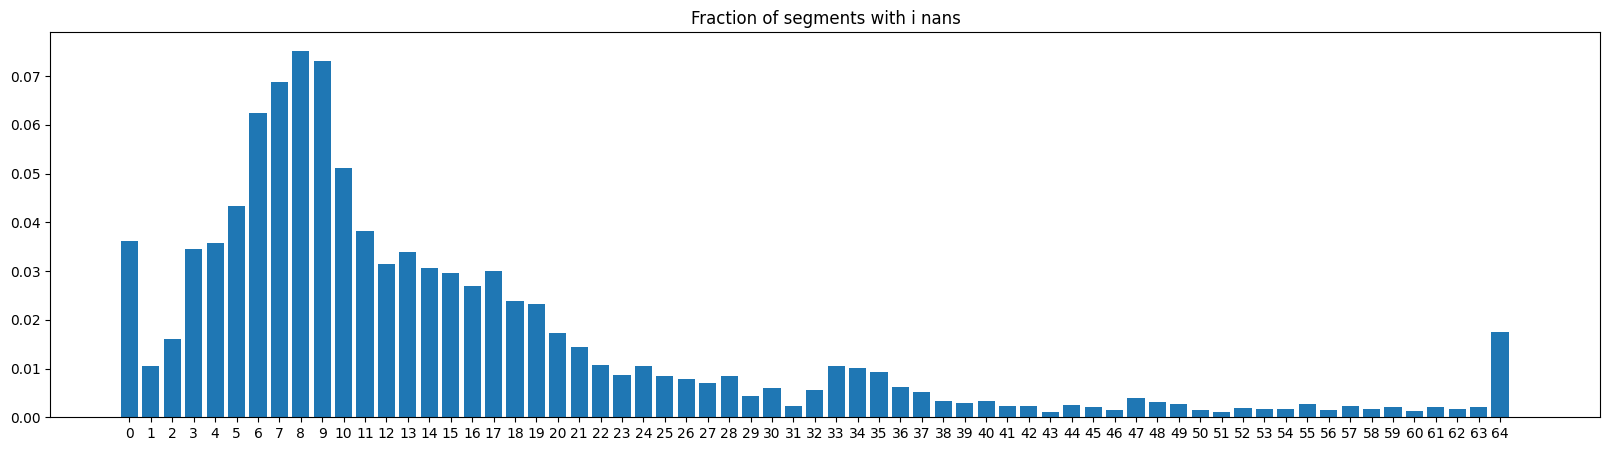

In [ ]:
def ds_nanstats(ds):
    n_obs = ds.size
    n_segs, n_bins = ds.shape
    print("dataset shape: ", ds.shape)
    print("total number of entries: ", n_obs)
    notnans = (np.where(~np.isnan(ds))[0]).shape[0]
    print("fraction of valid observations: ", notnans / n_obs)
    nonans = np.apply_along_axis(lambda track: ~np.isnan(track).any(), 1, ds)
    full_tracks = np.where(nonans)[0]
    print("fraction of segments without any nans: ", full_tracks.size / n_segs)
    bins_nan_stat = []
    for i in range(n_bins + 1):
        badsegs = np.apply_along_axis(lambda seg: np.sum(np.isnan(seg)) == i, 1, ds)
        bins_nan_stat.append(badsegs.sum() / n_segs)
    plt.figure(figsize=(20, 5))
    plt.title("Fraction of segments with i nans")
    plt.xticks(np.arange(0, n_bins, 1))
    plt.bar(range(n_bins + 1), bins_nan_stat)
    plt.show

ds_nanstats(ds[0])
